<a href="https://www.kaggle.com/code/lillynguyen0510/wine-quality-prediction?scriptVersionId=183436517" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [1]:
#Import libraries
library(dplyr)
library(corrplot)
library(GGally)
library(ggplot2)
library(rpart)
library(caret)
library(partykit)
library(torch)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



# Load Wine dataset

In [2]:
redurl = 'https://raw.githubusercontent.com/ccscaiado/MLRepo/main/Assignment%202%20Datasets/Wine%20Quality/winequality-red.csv'
redwinedata = read.csv(redurl, header = TRUE, sep = ';')

whiteurl = 'https://raw.githubusercontent.com/ccscaiado/MLRepo/main/Assignment%202%20Datasets/Wine%20Quality/winequality-white.csv'
whitewinedata = read.csv(whiteurl, header = TRUE, sep = ';')

# Data Cleaning and Exploratory Data Analysis

## Data Cleaning

In [3]:
#Check data types and dimension

print(str(redwinedata))
print(str(whitewinedata))

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
NULL
'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 

In [4]:
#Adding a categorical variable
redwinedata$type = 'red'
whitewinedata$type = 'white'

#Combining 2 datasets
winedata = rbind(redwinedata, whitewinedata)

#Print the first 5 rows
head(winedata)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [5]:
# Check data types and dimension of the combined dataset
str(winedata)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ type                : chr  "red" "red" "red" "red" ...


In [6]:
# Check for missing values
sum(is.na(winedata))

[1] 0

## Exploratory Data Analysis

In [7]:
# Set size for all following plots
options(repr.plot.width = 13, repr.plot.height = 10)

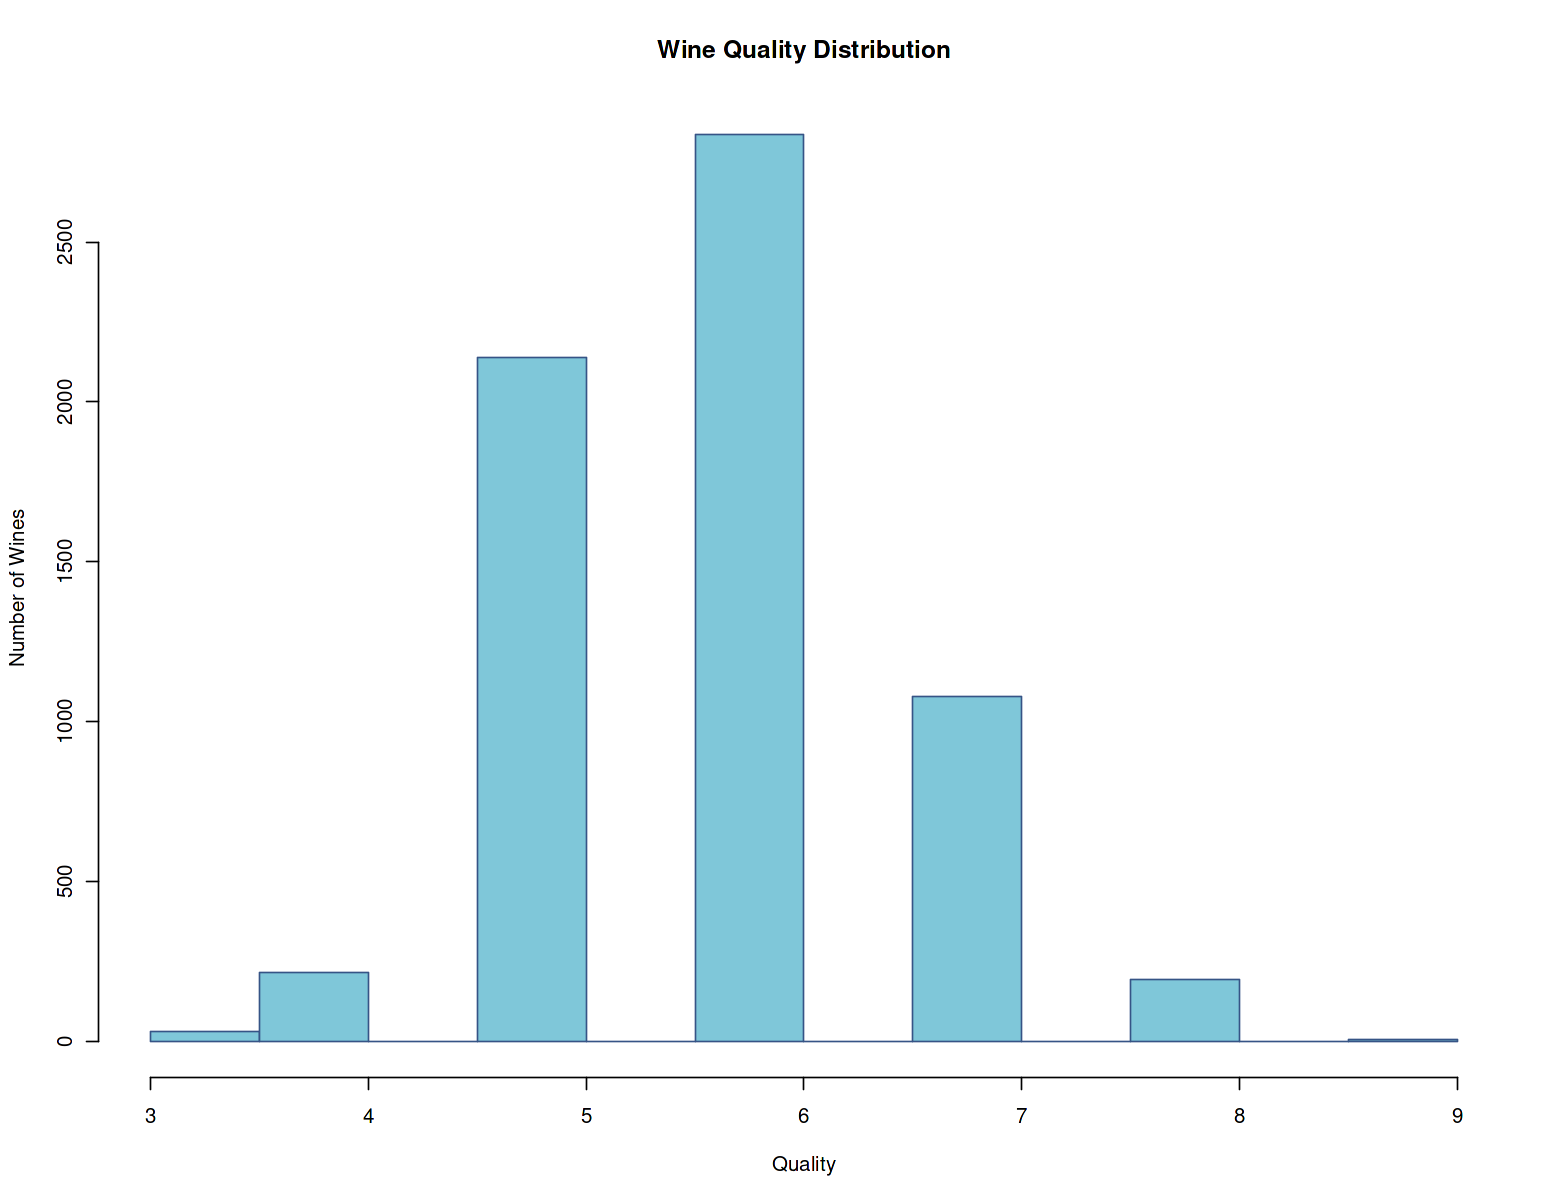

In [8]:
# Wine Quality Distribution
hist(winedata$quality, main = 'Wine Quality Distribution', col = '#7FC7D9', border = '#365486',
    xlab = "Quality", ylab = "Number of Wines")

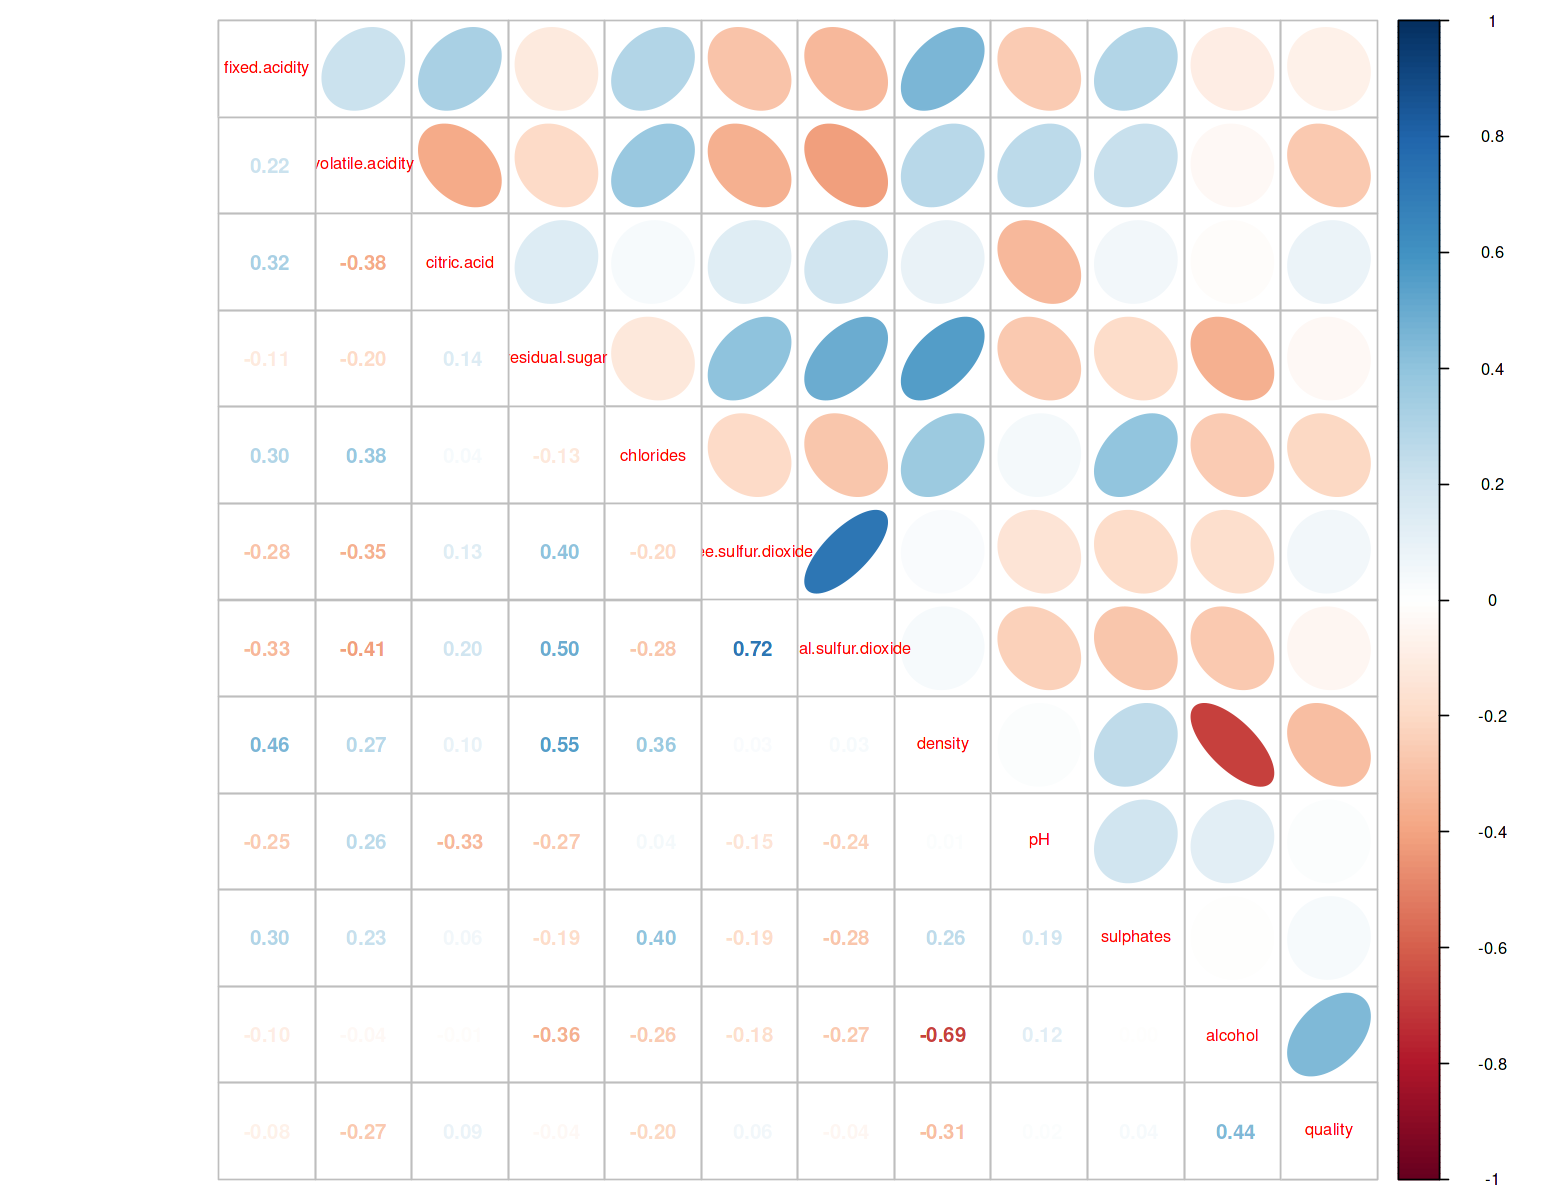

In [9]:
# Draw correlation plot
numeric_data = subset(winedata, select = -(type))

corrplot.mixed(cor(numeric_data), upper = 'ellipse', lower = 'number', number.cex = 1, tl.cex = 0.8)

# Modelling

## Data Preparation

In [10]:
# Group data into 3 categories 
winedata <- winedata %>%
  mutate(QualityFactor = cut(quality, 
                             breaks = c(3, 4, 6, 9),
                             labels = c("Low", "Medium", "High"),
                             include.lowest = TRUE))

In [11]:
# Drop the unnecessay columns
winedata_cleaned = winedata %>% select(-c(quality,type))

In [12]:
# Splitting data into training and testing with 80 and 20 percent respectively
set.seed(0)
n = nrow(winedata_cleaned)
ind = sample(1:n, size = 0.8 * n)

# Data used for training
training_data = winedata_cleaned[ind,]

# Data used for evaluation
testing_data = winedata_cleaned[-ind,]

## Classification and Regression Tree

### Building Model

In [13]:
# Build the Decision Tree
decision_tree = rpart(QualityFactor ~ .,
            data = training_data,
            method = "class")
decision_tree

n= 5197 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 5197 1220 Medium (0.03598230 0.76524918 0.19876852)  
   2) alcohol< 10.95 3441  459 Medium (0.04039523 0.86660854 0.09299622) *
   3) alcohol>=10.95 1756  761 Medium (0.02733485 0.56662870 0.40603645)  
     6) alcohol< 11.775 851  294 Medium (0.04347826 0.65452409 0.30199765) *
     7) alcohol>=11.775 905  449 High (0.01215470 0.48397790 0.50386740)  
      14) chlorides>=0.0385 338  141 Medium (0.01183432 0.58284024 0.40532544)  
        28) sulphates< 0.685 247   85 Medium (0.01619433 0.65587045 0.32793522) *
        29) sulphates>=0.685 91   35 High (0.00000000 0.38461538 0.61538462) *
      15) chlorides< 0.0385 567  248 High (0.01234568 0.42504409 0.56261023)  
        30) free.sulfur.dioxide< 21.5 140   57 Medium (0.05000000 0.59285714 0.35714286) *
        31) free.sulfur.dioxide>=21.5 427  158 High (0.00000000 0.37002342 0.62997658) *

In [14]:
# Print the cost complexity parameter (CP) 
printcp(decision_tree)


Classification tree:
rpart(formula = QualityFactor ~ ., data = training_data, method = "class")

Variables actually used in tree construction:
[1] alcohol             chlorides           free.sulfur.dioxide
[4] sulphates          

Root node error: 1220/5197 = 0.23475

n= 5197 

        CP nsplit rel error  xerror     xstd
1 0.021311      0   1.00000 1.00000 0.025045
2 0.017213      4   0.90902 0.99426 0.024995
3 0.010000      5   0.89180 0.95000 0.024597


In [15]:
# Retrieve the CP value that corresponds to the lowest xerro
optimal_cp = decision_tree$cptable %>%
                      as.data.frame %>%
                      slice(which.min(xerror)) %>%
                      select(CP) %>%
                      as.numeric
optimal_cp

[1] 0.01

In [16]:
# Prune the tree
decision_tree_pruned = prune(decision_tree,optimal_cp)
decision_tree_pruned

n= 5197 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 5197 1220 Medium (0.03598230 0.76524918 0.19876852)  
   2) alcohol< 10.95 3441  459 Medium (0.04039523 0.86660854 0.09299622) *
   3) alcohol>=10.95 1756  761 Medium (0.02733485 0.56662870 0.40603645)  
     6) alcohol< 11.775 851  294 Medium (0.04347826 0.65452409 0.30199765) *
     7) alcohol>=11.775 905  449 High (0.01215470 0.48397790 0.50386740)  
      14) chlorides>=0.0385 338  141 Medium (0.01183432 0.58284024 0.40532544)  
        28) sulphates< 0.685 247   85 Medium (0.01619433 0.65587045 0.32793522) *
        29) sulphates>=0.685 91   35 High (0.00000000 0.38461538 0.61538462) *
      15) chlorides< 0.0385 567  248 High (0.01234568 0.42504409 0.56261023)  
        30) free.sulfur.dioxide< 21.5 140   57 Medium (0.05000000 0.59285714 0.35714286) *
        31) free.sulfur.dioxide>=21.5 427  158 High (0.00000000 0.37002342 0.62997658) *

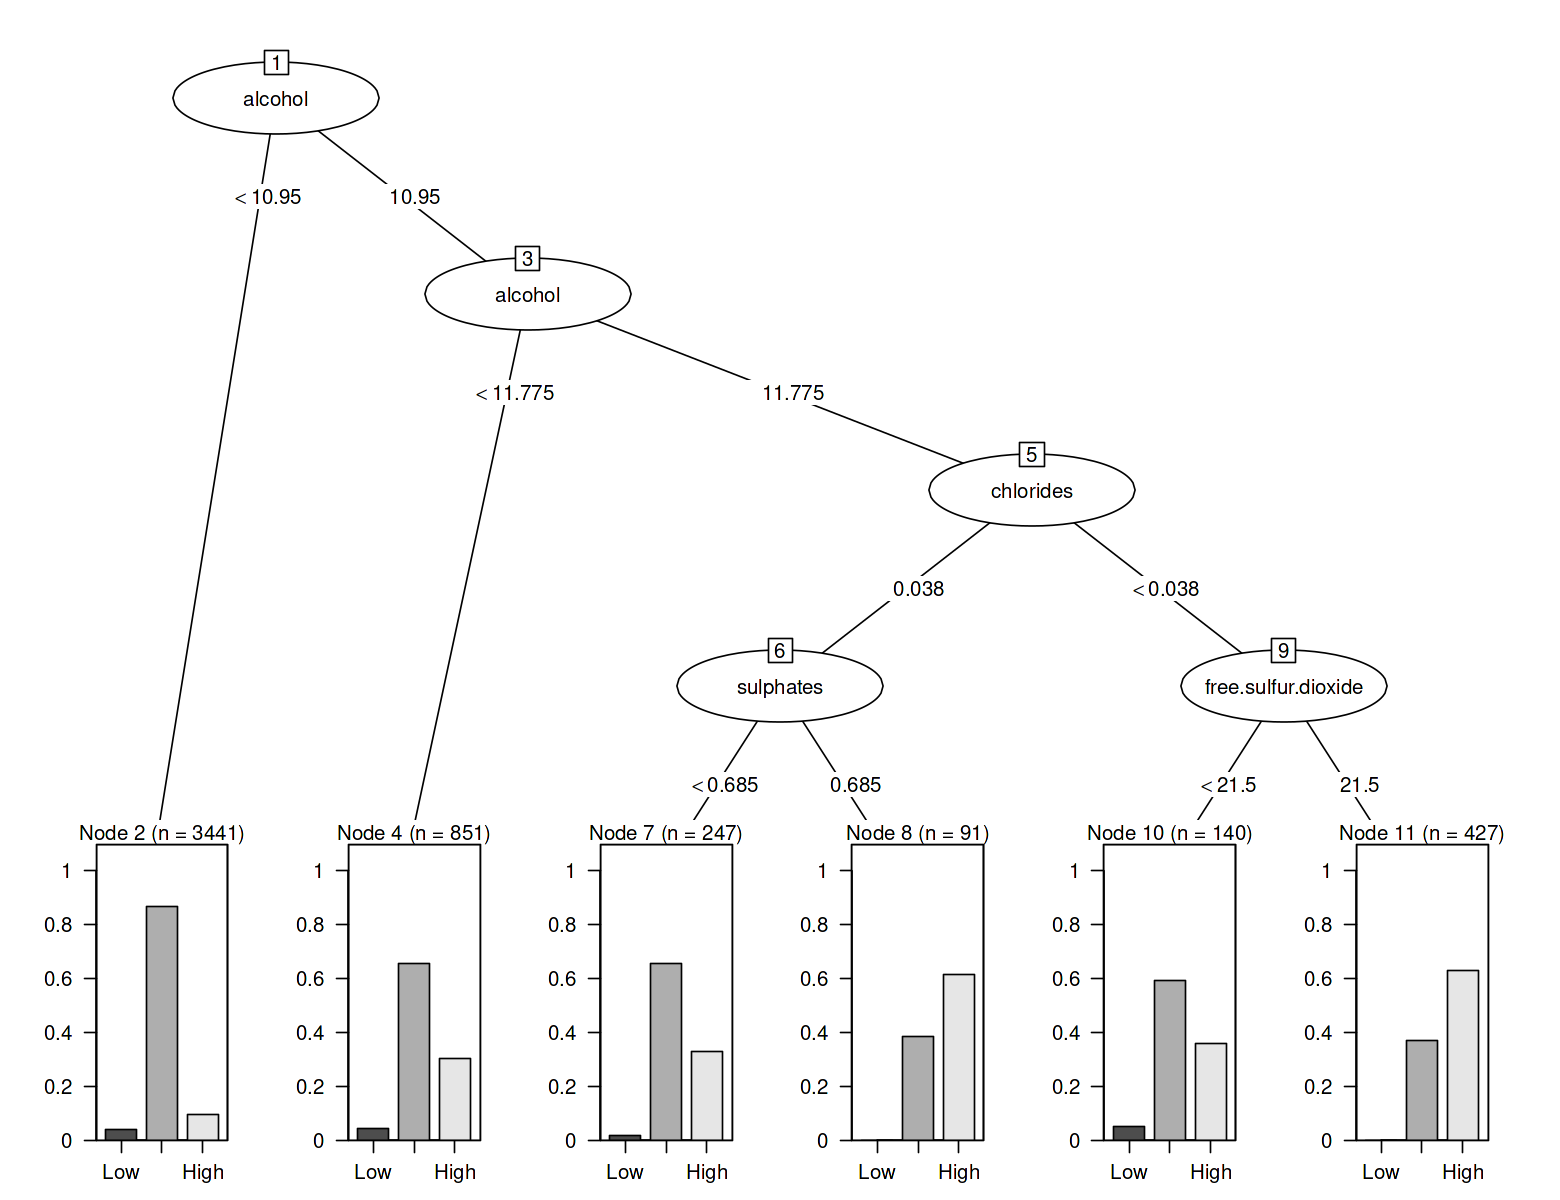

In [17]:
# Create visual representation of decision tree based on  final fitted model after any tuning or cross-validation procedures
plot(as.party(decision_tree_pruned))

### Validation

In [18]:
#Prediction on new data
check_fit = predict(decision_tree_pruned, newdata = testing_data, type = "class")

#Check fit
confusionMatrix(check_fit, testing_data$QualityFactor)

Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low      0      0    0
    Medium  59    951  176
    High     0     46   68

Overall Statistics
                                          
               Accuracy : 0.7838          
                 95% CI : (0.7605, 0.8059)
    No Information Rate : 0.7669          
    P-Value [Acc > NIR] : 0.07832         
                                          
                  Kappa : 0.2385          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity             0.00000        0.9539     0.27869
Specificity             1.00000        0.2244     0.95644
Pos Pred Value              NaN        0.8019     0.59649
Neg Pred Value          0.95462        0.5965     0.85160
Prevalence              0.04538        0.7669     0.18769
Detection Rate          0.00000        0.7315     0.05231
Det

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


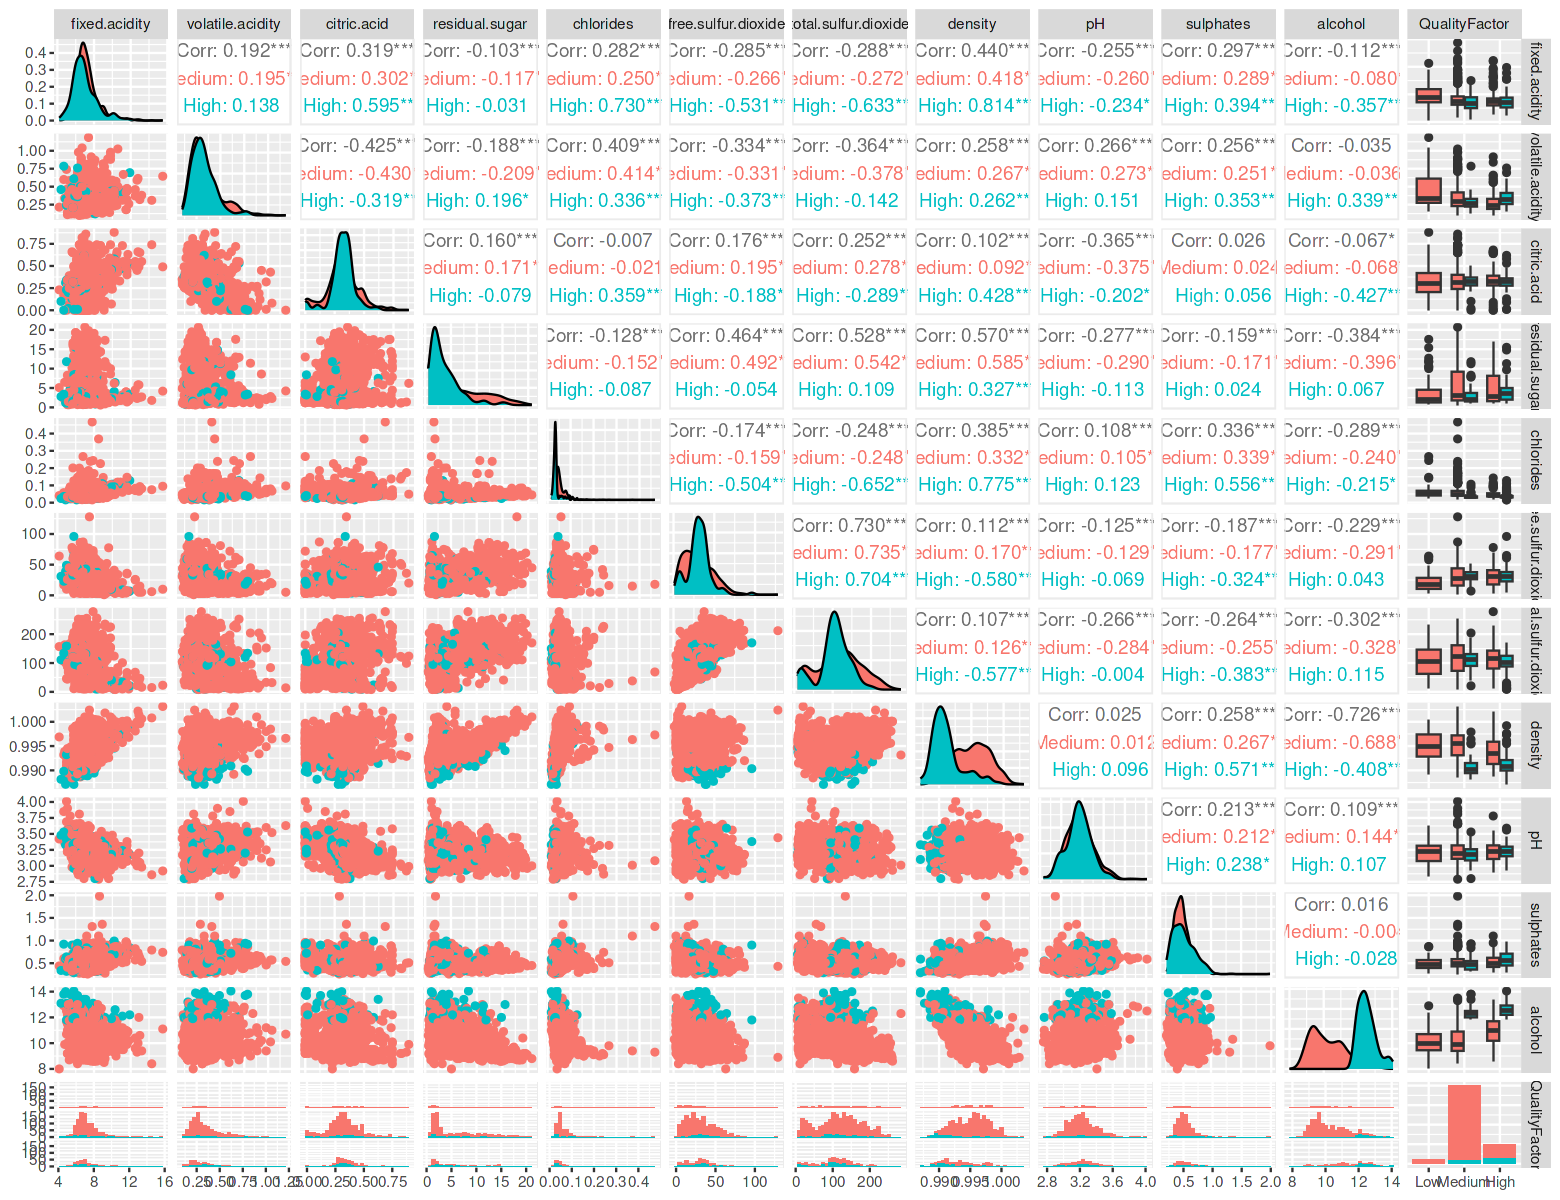

In [19]:
ggpairs(testing_data, aes(color = check_fit))

## Neural Network

### Data Scaling

In [20]:
# Exclude the quality and type columns and then rescale
rescaled_training_data = training_data %>%
  select(-(QualityFactor)) %>%
  mutate(across(everything(), scales::rescale))

rescaled_testing_data = testing_data %>%
  select(-c(QualityFactor)) %>%
  mutate(across(everything(), scales::rescale))

In [21]:
# Turning data into tensor

torch_train = torch_tensor(as.matrix(rescaled_training_data),dtype = torch_float())

torch_train_target = torch_tensor(as.numeric(training_data$QualityFactor), dtype = torch_long())

torch_test = torch_tensor(as.matrix(rescaled_testing_data),dtype = torch_float())

### Building Model

In [22]:
# Set a seed for torch random operations
torch_manual_seed(0)

# Build neural network with 4 layers
model_nn = nn_sequential(
    
    #Layer 1
    nn_linear(11,100),
    nn_relu(),
    
    #Layer 2
    nn_linear(100,50),
    nn_relu(),
    
    #Layer 3
    nn_linear(50,20),
    nn_relu(),
    
    #Layer 4
    nn_linear(20,3)
    )

# Define cost and optimizer
criterion = nn_cross_entropy_loss()
optimizer = optim_adam(model_nn$parameters, lr = 0.03)

# Define epochs
epochs = 1000

# Loop through each epoch
for(i in 1:epochs){

    optimizer$zero_grad()
    
    y_pred = model_nn(torch_train)
    
    loss = criterion(y_pred, torch_train_target)
    
    loss$backward()
    
    optimizer$step()
    
    #Check Training
    if(i %% 100 == 0){
        
        winners = y_pred$argmax(dim=2)
        
        corrects = (winners == torch_train_target)
        
        accuracy = corrects$sum()$item() / torch_train_target$size()
        
        cat(" Epoch:", i,"Loss: ", loss$item()," Accuracy:",accuracy,"\n")
    }
    }

 Epoch: 100 Loss:  0.5047864  Accuracy: 0.779873 
 Epoch: 200 Loss:  0.4616886  Accuracy: 0.7956513 
 Epoch: 300 Loss:  0.442506  Accuracy: 0.8100827 
 Epoch: 400 Loss:  0.4329847  Accuracy: 0.8116221 
 Epoch: 500 Loss:  0.4090423  Accuracy: 0.8264383 
 Epoch: 600 Loss:  0.3908604  Accuracy: 0.8283625 
 Epoch: 700 Loss:  0.3774719  Accuracy: 0.8379835 
 Epoch: 800 Loss:  0.3519681  Accuracy: 0.8464499 
 Epoch: 900 Loss:  0.3365143  Accuracy: 0.8527997 
 Epoch: 1000 Loss:  0.3165006  Accuracy: 0.8629979 


### Validation

In [23]:
#Prediction on new data
testing_data$nn = cut(as.numeric(model_nn(torch_test)$argmax(dim=2)), 3, labels = levels(testing_data$QualityFactor))

#Check fit
confusionMatrix(testing_data$nn , testing_data$QualityFactor)

Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low      8     27    3
    Medium  51    945  228
    High     0     25   13

Overall Statistics
                                          
               Accuracy : 0.7431          
                 95% CI : (0.7184, 0.7666)
    No Information Rate : 0.7669          
    P-Value [Acc > NIR] : 0.9797          
                                          
                  Kappa : 0.0523          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity            0.135593       0.94784     0.05328
Specificity            0.975826       0.07921     0.97633
Pos Pred Value         0.210526       0.77206     0.34211
Neg Pred Value         0.959588       0.31579     0.81696
Prevalence             0.045385       0.76692     0.18769
Detection Rate         0.006154       0.72692     0.01000
Det